1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
# generating the dataset 'X'
import numpy as np
import numpy.random as npr
import pandas as pd
seed = 123
npr.seed(seed)
N = 10000
x1 = npr.normal(loc=0, scale=1, size=N)
x2 = x1+npr.normal(loc=0, scale=3, size=N)
x3 = (2*x1)+x2
X = pd.DataFrame({'x1':x1, 'x2':x2, 'x3':x3})
print("Dataset 'X':")
X

Dataset 'X':


,x1,x2,x3
0,-1.085631,-4.808540,-6.979801
1,0.997345,0.058505,2.053196
2,0.282978,-2.263862,-1.697905
3,-1.506295,5.627563,2.614974
4,-0.578600,1.393902,0.236701
...,...,...,...
9995,-0.597918,-3.439680,-4.635516
9996,-1.397932,-2.173765,-4.969628
9997,-0.472266,-4.680786,-5.625319
9998,0.581964,3.715587,4.879516


In [2]:
# finding the eigenvectors and eigenvalues of the covariance matrix of the dataset 'X'
from scipy import linalg as la
cov_X = np.cov(X.T)
print("Covariance matrix of the dataset 'X':\n", cov_X)
l, V = la.eig(cov_X)
l = np.real_if_close(l)

# sorting the eigenvalues and the corresponding eigenvectors in ascending order w.r.t. the eigenvalues
idx = l.argsort()[::-1]   
l = l[idx]
V = V[:,idx]
print("\nEigenvalues of the covariance matrix of the dataset 'X':\n", l)
print("\nEigenvectors of the covariance matrix of the dataset 'X':\n", V)

Covariance matrix of the dataset 'X':
 [[ 0.9963309   1.01274006  3.00540186]
 [ 1.01274006 10.07612824 12.10160836]
 [ 3.00540186 12.10160836 18.11241208]]

Eigenvalues of the covariance matrix of the dataset 'X':
 [ 2.71963272e+01  1.98854398e+00 -9.60548098e-17]

Eigenvectors of the covariance matrix of the dataset 'X':
 [[-0.11501897  0.56577732 -0.81649658]
 [-0.5779139  -0.7066462  -0.40824829]
 [-0.80795183  0.42490843  0.40824829]]


In [3]:
# finding the eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(X.T)
l_svd = spectrum**2/(N-1)
l_svd = np.real_if_close(l_svd)
V_svd = U

# sorting the eigenvalues and the corresponding eigenvectors in ascending order w.r.t. the eigenvalues
idx = l_svd.argsort()[::-1]   
l_svd = l_svd[idx]
V_svd = V_svd[:,idx]
print("Eigenvalues using SVD:\n", l_svd)
print("\nEigenvectors using SVD:\n", V_svd)

# checking the eigendecomposition of the covariance matrix of 'X'
Lambda = np.diag(l)
print("\nChecking the eigendecomposition of the covariance matrix of 'X':")
print("cov(X) = V*Lambda*V^(-1)? --->", np.allclose(cov_X, np.dot(V, np.dot(Lambda, la.inv(V)))))

# checking the SVD of 'X'
m, n = len(U), len(Vt)
D = np.zeros(shape=(m, n))
np.fill_diagonal(a=D, val=spectrum)
print("\nChecking the SVD of 'X':")
print("X = U*D*V^(T)? --->", np.allclose(X.T, np.dot(U, np.dot(D, Vt))))

# checking if the two procedures yield to the same result
print("\nDo the two procedures yield to the same result? --->", np.allclose(l, l_svd, rtol=10**(-3)) == True and np.allclose(V, V_svd, rtol=10**(-3)) == True)

Eigenvalues using SVD:
 [2.72017168e+01 1.98854901e+00 2.44580811e-29]

Eigenvectors using SVD:
 [[-0.11502266  0.56577656 -0.81649658]
 [-0.57790929 -0.70664998 -0.40824829]
 [-0.80795461  0.42490315  0.40824829]]

Checking the eigendecomposition of the covariance matrix of 'X':
cov(X) = V*Lambda*V^(-1)? ---> True

Checking the SVD of 'X':
X = U*D*V^(T)? ---> True

Do the two procedures yield to the same result? ---> True


In [4]:
# computing the percentage of the total dataset's variability explained by each component
print("Lambda matrix resulting from the eigendecomposition of the covariance matrix of 'X':\n", Lambda, "\n")
print("Percentage of the total dataset's variability explained by each component of the original dataset 'X':")
for i, j in zip(V, np.diagonal(Lambda)):
    print("- Eigenvector:", i, "---> Eigenvalue:", j, "---> Variability explained:", (j/Lambda.trace())*100, "%")

# commenting on the above percentages
print("\nAs expected, the first two components are enough to explain almost " + str("100%") + " of the total dataset's variability.")
print("This makes sense because the variable 'x3' has been constructed as a linear combination of the variables 'x1' and 'x2', so it is linearly dependent on them!")

# reducing the dimensionality of the dataset so that at least 99% of the total variability is retained
from sklearn.decomposition import PCA
var_min = 0.99   # minimum percentage of variability that needs to be explained by 'n_components' (number of components to keep)
pca = PCA(n_components=var_min, svd_solver='full')
pc = pca.fit_transform(X)
columns_labels = [str('principal component ' + str(i)) for i in range(pc.shape[1])]
X_principal = pd.DataFrame(data=pc, columns=columns_labels)
print("\nNumber of components in the reduced dataset 'X_principal':", X_principal.shape[1])
var_ratios = pca.explained_variance_ratio_
print("Percentage of the total dataset's variability explained by the reduced dataset 'X_principal':", np.sum(var_ratios)*100, "%")
print("Percentage of the total dataset's variability explained by each component of the reduced dataset 'X_principal':")
for i, j in zip(columns_labels, var_ratios):
    print("- Variability explained by the " + i + ":", j*100, "%")
print("\nReduced dataset 'X_principal':")    
X_principal

Lambda matrix resulting from the eigendecomposition of the covariance matrix of 'X':
 [[ 2.71963272e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.98854398e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -9.60548098e-17]] 

Percentage of the total dataset's variability explained by each component of the original dataset 'X':
- Eigenvector: [-0.11501897  0.56577732 -0.81649658] ---> Eigenvalue: 27.196327231632697 ---> Variability explained: 93.18638767200652 %
- Eigenvector: [-0.5779139  -0.7066462  -0.40824829] ---> Eigenvalue: 1.9885439829884464 ---> Variability explained: 6.813612327993479 %
- Eigenvector: [-0.80795183  0.42490843  0.40824829] ---> Eigenvalue: -9.60548097989e-17 ---> Variability explained: -3.291253509139287e-16 %

As expected, the first two components are enough to explain almost 100% of the total dataset's variability.
This makes sense because the variable 'x3' has been constructed as a linear combination of the variables 'x1' and 'x2', so it is l

,principal component 0,principal component 1
0,-8.616543,-0.184307
1,1.733998,1.393112
2,-2.721005,1.036156
3,5.118357,-3.720041
4,0.856838,-1.214020
...,...,...
9995,-5.875294,0.120438
9996,-5.505668,-1.368714
9997,-7.377807,0.647975
9998,6.083230,-0.225238


In [5]:
# creating the dataset 'Xp' obtained as redefinition of the original dataset 'X' in the basis yielded by the PCA procedure
Xp = pd.DataFrame(data=np.dot(X, V), columns=X.columns+'p')
print("Rotated dataset 'Xp':")
Xp

Rotated dataset 'Xp':


,x1p,x2p,x3p
0,8.543133,-0.182065,-1.332268e-15
1,-1.807408,1.395353,-2.220446e-16
2,2.647595,1.038398,-9.992007e-16
3,-5.191767,-3.717799,2.886580e-15
4,-0.930248,-1.211778,7.771561e-16
...,...,...,...
9995,5.801884,0.122679,-1.332268e-15
9996,5.432258,-1.366472,-4.440892e-16
9997,7.304397,0.650217,-1.776357e-15
9998,-6.156640,-0.222996,8.881784e-16


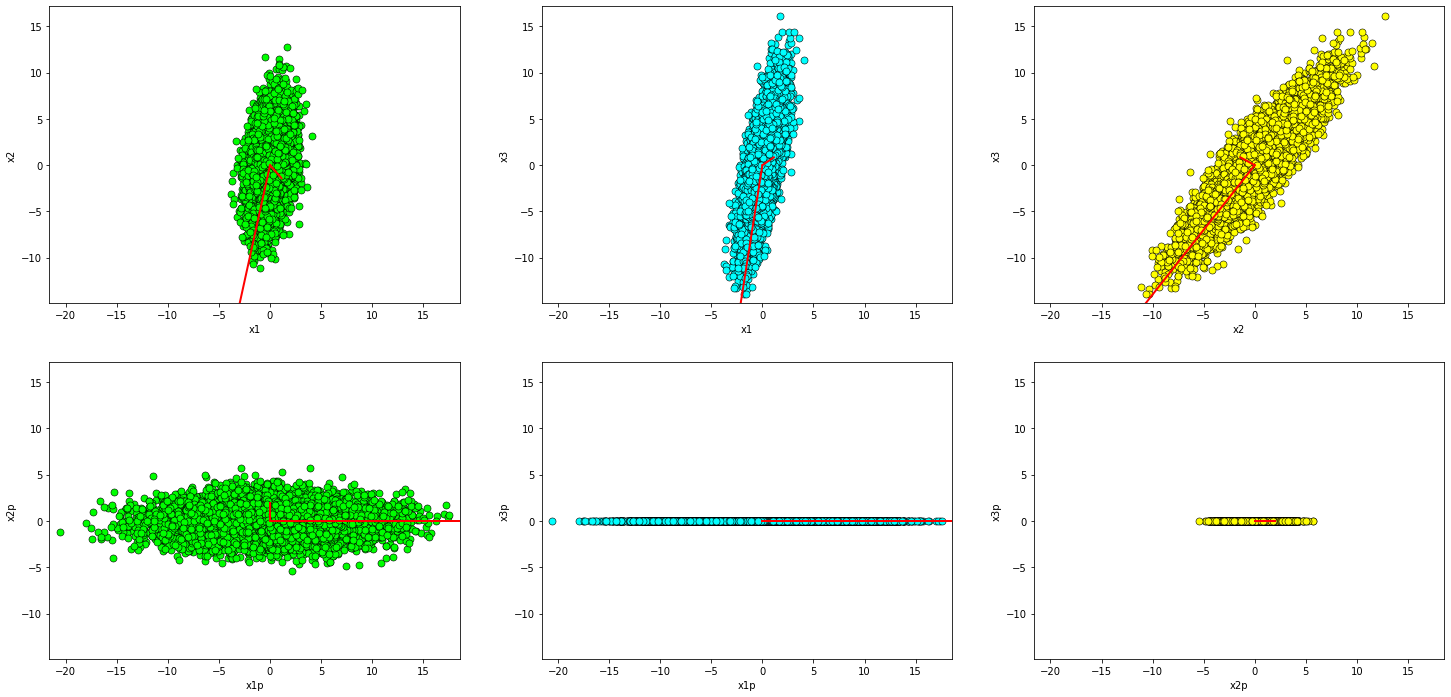

In [6]:
# creating the set of scatter plots
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 12))

# setting the same axes limits for all the scatter plots in order to get the correct visual effect when comparing the plots themselves to each other
x_min = np.min([X[['x1', 'x2']], Xp[['x1p', 'x2p']]])-1
x_max = np.max([X[['x1', 'x2']], Xp[['x1p', 'x2p']]])+1
y_min = np.min([X[['x2', 'x3']], Xp[['x2p', 'x3p']]])-1
y_max = np.max([X[['x2', 'x3']], Xp[['x2p', 'x3p']]])+1
custom_xlim = [x_min, x_max]
custom_ylim = [y_min, y_max]
plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)

# plotting (x1, x2)
sns.scatterplot(data=X, x="x1", y="x2", ax=ax[0,0], s=50, color='lime', edgecolor='black')
for li, vi in zip(l, V.T):
    ax[0,0].plot([0, li*vi[0]], [0, li*vi[1]], '-r', lw=2)   # drawing the corresponding eigenvectors

# plotting (x1, x3)
sns.scatterplot(data=X, x="x1", y="x3", ax=ax[0,1], s=50, color='cyan', edgecolor='black')
for li, vi in zip(l, V.T):
    ax[0,1].plot([0, li*vi[0]], [0, li*vi[2]], '-r', lw=2)   # drawing the corresponding eigenvectors

# plotting (x2, x3)
sns.scatterplot(data=X, x="x2", y="x3", ax=ax[0,2], s=50, color='yellow', edgecolor='black')
for li, vi in zip(l, V.T):
    ax[0,2].plot([0, li*vi[1]], [0, li*vi[2]], '-r', lw=2)   # drawing the corresponding eigenvectors

# plotting (x1p, x2p)
sns.scatterplot(data=Xp, x="x1p", y="x2p", ax=ax[1,0], s=50, color='lime', edgecolor='black')
for li, vi in zip(l, np.diag([1]*3)):
    ax[1,0].plot([0, li*vi[0]], [0, li*vi[1]], '-r', lw=2)   # drawing the corresponding eigenvectors

# plotting (x1p, x3p)
sns.scatterplot(data=Xp, x="x1p", y="x3p", ax=ax[1,1], s=50, color='cyan', edgecolor='black')
for li, vi in zip(l, np.diag([1]*3)):
    ax[1,1].plot([0, li*vi[0]], [0, li*vi[2]], '-r', lw=2)   # drawing the corresponding eigenvectors

# plotting (x2p, x3p)
sns.scatterplot(data=Xp, x="x2p", y="x3p", ax=ax[1,2], s=50, color='yellow', edgecolor='black')
for li, vi in zip(l, np.diag([1]*3)):
    ax[1,2].plot([0, li*vi[1]], [0, li*vi[2]], '-r', lw=2)   # drawing the corresponding eigenvectors

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [7]:
# adding uncorrelated random noise to the dataset 'X'
n_noises = 10   # number of noise variables
for i in range(n_noises):
    std = (npr.uniform(1, 3))/50   # std of the i-th noise variable
    X["noise" + str(i)] = npr.normal(loc=0, scale=std, size=N)
print("Dataset 'X':")
X

Dataset 'X':


,x1,x2,x3,noise0,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8,noise9
0,-1.085631,-4.808540,-6.979801,0.034949,0.025418,-0.037632,0.054886,-0.002859,-0.010307,0.013265,-0.062753,0.065179,0.038308
1,0.997345,0.058505,2.053196,0.013092,0.025857,0.020235,0.058945,0.024888,0.015739,0.011341,-0.042264,-0.023142,0.001395
2,0.282978,-2.263862,-1.697905,-0.105271,-0.042385,-0.026632,-0.007767,0.001369,0.005073,-0.057921,-0.089072,0.014179,-0.005156
3,-1.506295,5.627563,2.614974,0.085632,0.041259,0.017959,-0.000558,-0.042529,-0.063129,0.009308,0.058726,0.100128,-0.017765
4,-0.578600,1.393902,0.236701,-0.019681,-0.027364,0.007356,0.087895,0.032533,-0.074615,0.003930,-0.063569,0.048702,0.018929
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.597918,-3.439680,-4.635516,0.024683,-0.023528,0.017745,0.048379,0.015428,0.030135,0.028723,0.076316,-0.023204,0.012048
9996,-1.397932,-2.173765,-4.969628,0.020516,-0.003024,0.025978,-0.059491,-0.035871,-0.031103,-0.012403,-0.001301,0.051964,0.043242
9997,-0.472266,-4.680786,-5.625319,0.001112,0.054387,0.037487,-0.029840,0.013108,-0.044903,-0.063291,0.055711,0.040007,-0.013862
9998,0.581964,3.715587,4.879516,-0.053364,-0.066779,-0.015315,0.007393,-0.043686,0.076913,0.024587,-0.001214,-0.072707,0.025307


In [8]:
# finding the eigenvectors and eigenvalues of the covariance matrix of the dataset 'X'
cov_X = np.cov(X.T)
#print("Covariance matrix of the dataset 'X':\n", cov_X)
l, V = la.eig(cov_X)
l = np.real_if_close(l)

# sorting the eigenvalues and the corresponding eigenvectors in ascending order w.r.t. the eigenvalues
idx = l.argsort()[::-1]   
l = l[idx]
V = V[:,idx]
print("\nEigenvalues of the covariance matrix of the dataset 'X':\n", l)
#print("\nEigenvectors of the covariance matrix of the dataset 'X':\n", V)


Eigenvalues of the covariance matrix of the dataset 'X':
 [2.71963293e+01 1.98854469e+00 3.07384418e-03 2.76236158e-03
 2.35880754e-03 2.31140158e-03 2.24144008e-03 1.47778869e-03
 1.41538484e-03 1.19785154e-03 7.12832459e-04 5.30304738e-04
 1.70965672e-14]


In [9]:
# finding the eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(X.T)
l_svd = spectrum**2/(N-1)
l_svd = np.real_if_close(l_svd)
V_svd = U

# sorting the eigenvalues and the corresponding eigenvectors in ascending order w.r.t. the eigenvalues
idx = l_svd.argsort()[::-1]   
l_svd = l_svd[idx]
V_svd = V_svd[:,idx]
print("Eigenvalues using SVD:\n", l_svd)
#print("\nEigenvectors using SVD:\n", V_svd)

# checking the eigendecomposition of the covariance matrix of 'X'
Lambda = np.diag(l)
print("\nChecking the eigendecomposition of the covariance matrix of 'X':")
print("cov(X) = V*Lambda*V^(-1)? --->", np.allclose(cov_X, np.dot(V, np.dot(Lambda, la.inv(V)))))

# checking the SVD of 'X'
m, n = len(U), len(Vt)
D = np.zeros(shape=(m, n))
np.fill_diagonal(a=D, val=spectrum)
print("\nChecking the SVD of 'X':")
print("X = U*D*V^(T)? --->", np.allclose(X.T, np.dot(U, np.dot(D, Vt))))

# checking if the two procedures yield to the same result
print("\nDo the two procedures yield to the same result? --->", np.allclose(l, l_svd, rtol=10**(-3)) == True and np.allclose(V, V_svd, rtol=3) == True)

Eigenvalues using SVD:
 [2.72017188e+01 1.98854971e+00 3.07403895e-03 2.76368368e-03
 2.35914806e-03 2.31242411e-03 2.24237602e-03 1.47778936e-03
 1.41545259e-03 1.19788929e-03 7.12841038e-04 5.30325108e-04
 2.45155657e-29]

Checking the eigendecomposition of the covariance matrix of 'X':
cov(X) = V*Lambda*V^(-1)? ---> True

Checking the SVD of 'X':
X = U*D*V^(T)? ---> True

Do the two procedures yield to the same result? ---> True


In [10]:
# computing the percentage of the total dataset's variability explained by each component
#print("Lambda matrix resulting from the eigendecomposition of the covariance matrix of 'X':\n", Lambda, "\n")
print("Percentage of the total dataset's variability explained by each component of the original dataset 'X':")
for i, j in zip(V, np.diagonal(Lambda)):
    #print("- Eigenvector:", i, "---> Eigenvalue:", j, "---> Variability explained:", (j/Lambda.trace())*100, "%")
    print("- Eigenvalue:", j, "---> Variability explained:", (j/Lambda.trace())*100, "%")

# commenting on the above percentages
print("\nAs in the previous exercise, the first two components are enough to explain almost " + str("100%") + " of the total dataset's variability.")
print("This makes sense because the noise variables are less widely distributed around 0 w.r.t. 'x1' and 'x2' (std of a factor 50 smaller than those used to generate 'x1' and 'x2').")
print("Consequently, the noise behaves almost like a constant w.r.t. 'x1' and 'x2'!")

# reducing the dimensionality of the dataset so that at least 99% of the total variability is retained
var_min = 0.99   # minimum percentage of variability that needs to be explained by 'n_components' (number of components to keep)
pca = PCA(n_components=var_min, svd_solver='full')
pc = pca.fit_transform(X)
columns_labels = [str('principal component ' + str(i)) for i in range(pc.shape[1])]
X_principal = pd.DataFrame(data=pc, columns=columns_labels)
print("\nNumber of components in the reduced dataset 'X_principal':", X_principal.shape[1])
var_ratios = pca.explained_variance_ratio_
print("Percentage of the total dataset's variability explained by the reduced dataset 'X_principal':", np.sum(var_ratios)*100, "%")
print("Percentage of the total dataset's variability explained by each component of the reduced dataset 'X_principal':")
for i, j in zip(columns_labels, var_ratios):
    print("- Variability explained by the " + i + ":", j*100, "%")
print("\nReduced dataset 'X_principal':")    
X_principal

Percentage of the total dataset's variability explained by each component of the original dataset 'X':
- Eigenvalue: 27.196329335725892 ---> Variability explained: 93.1286863447873 %
- Eigenvalue: 1.9885446890072827 ---> Variability explained: 6.809395206943612 %
- Eigenvalue: 0.003073844182150719 ---> Variability explained: 0.010525798065558062 %
- Eigenvalue: 0.0027623615769866864 ---> Variability explained: 0.009459184792859062 %
- Eigenvalue: 0.002358807537541664 ---> Variability explained: 0.008077290306338117 %
- Eigenvalue: 0.0023114015761742184 ---> Variability explained: 0.007914957557217358 %
- Eigenvalue: 0.002241440081443905 ---> Variability explained: 0.007675387649877215 %
- Eigenvalue: 0.001477788693450731 ---> Variability explained: 0.005060407896129517 %
- Eigenvalue: 0.001415384842127705 ---> Variability explained: 0.004846717709309543 %
- Eigenvalue: 0.0011978515429787828 ---> Variability explained: 0.00410181606703628 %
- Eigenvalue: 0.0007128324592353577 ---> Varia

,principal component 0,principal component 1
0,-8.616543,-0.184323
1,1.733988,1.393097
2,-2.720996,1.036148
3,5.118358,-3.720022
4,0.856840,-1.214046
...,...,...
9995,-5.875283,0.120423
9996,-5.505669,-1.368713
9997,-7.377810,0.648010
9998,6.083241,-0.225282


In [11]:
# creating the dataset 'Xp' obtained as redefinition of the original dataset 'X' in the basis yielded by the PCA procedure
Xp = pd.DataFrame(data=np.dot(X, V), columns=X.columns+'p')
print("Rotated dataset 'Xp':")
Xp

Rotated dataset 'Xp':


,x1p,x2p,x3p,noise0p,noise1p,noise2p,noise3p,noise4p,noise5p,noise6p,noise7p,noise8p,noise9p
0,8.543134,0.182081,-0.017742,-0.059851,0.005517,-0.092198,0.023745,-0.009919,-0.009377,-0.006018,-0.038647,0.038903,1.457381e-14
1,-1.807397,-1.395338,-0.021158,-0.046471,-0.054657,-0.031990,-0.011989,0.015244,-0.013423,0.022434,0.021015,0.002202,-7.612743e-15
2,2.647586,-1.038389,0.058571,-0.080263,-0.013969,0.051660,0.094058,0.004911,0.054077,0.005798,-0.025860,-0.004419,4.603152e-16
3,-5.191768,3.717780,-0.053274,0.058357,0.080127,-0.099098,-0.010044,-0.064377,-0.000989,-0.042680,0.017066,-0.017830,3.653105e-15
4,-0.930249,1.211804,0.034929,-0.053389,-0.045530,-0.073862,0.060544,-0.074814,-0.006586,0.030131,0.005727,0.020408,2.292526e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5.801873,-0.122664,0.013257,0.077801,-0.044057,-0.029567,-0.030795,0.032438,-0.028025,0.013664,0.016632,0.011565,9.631848e-15
9996,5.432260,1.366471,0.003331,0.002912,0.081343,-0.002948,0.006515,-0.032001,0.015056,-0.034406,0.024956,0.043170,1.303006e-14
9997,7.304401,-0.650252,-0.059080,0.051314,0.044310,-0.000436,0.019781,-0.044654,0.061791,0.019715,0.037475,-0.012990,1.046788e-14
9998,-6.156651,0.223040,0.067410,0.002719,-0.060532,0.064415,-0.004454,0.078167,-0.022357,-0.044898,-0.014705,0.023990,-9.998567e-15


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [12]:
# generating the dataset 'X' containing the simulated records of the spring's motion in the lab frame
def shm(A, omega, phi, t):   # simple harmonic motion
    return A*np.cos(omega*t-phi)
A = 10   # oscillation amplitude
omega = 10*np.pi   # angular frequency
phi = 0   # initial phase
T = (2*np.pi)/omega   # time period
N = 1000   # number of records
t = np.linspace(0, 5*T, N)   # time window in which the records are made
x_lab = shm(A, omega, phi, t)   # records of the spring's motion along the 'x' axis of the lab frame (shm)
y_lab = npr.normal(loc=0, scale=0.5, size=N)   # records of the spring's motion along the 'y' axis of the lab frame (random noise)
z_lab = np.zeros(N)   # records of the spring's motion along the 'z' axis of the lab frame (no motion)
X = pd.DataFrame({'t':t, 'x_lab':x_lab, 'y_lab':y_lab, 'z_lab':z_lab})
print("Dataset 'X':")
X

Dataset 'X':


,t,x_lab,y_lab,z_lab
0,0.000000,10.000000,-0.869288,0.0
1,0.001001,9.995056,-0.331215,0.0
2,0.002002,9.980228,-0.010976,0.0
3,0.003003,9.955531,0.115819,0.0
4,0.004004,9.920989,0.500315,0.0
...,...,...,...,...
995,0.995996,9.920989,-0.252288,0.0
996,0.996997,9.955531,0.291619,0.0
997,0.997998,9.980228,0.184708,0.0
998,0.998999,9.995056,0.045097,0.0


<AxesSubplot:xlabel='t', ylabel='z_lab'>

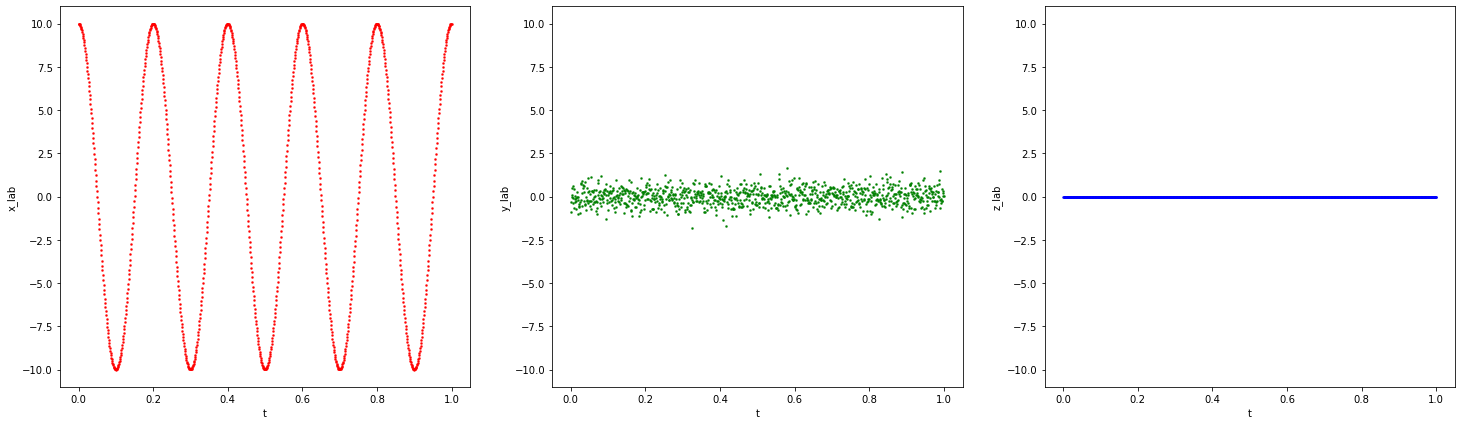

In [13]:
# creating a set of scatter plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# setting the same 'y' axis limits for all the scatter plots in order to get the correct visual effect when comparing the plots themselves to each other
y_min = np.min([X[['x_lab', 'y_lab', 'z_lab']]])-1
y_max = np.max([X[['x_lab', 'y_lab', 'z_lab']]])+1
custom_ylim = [y_min, y_max]
plt.setp(ax, ylim=custom_ylim)

# plotting (t, x_lab)
sns.scatterplot(data=X, x="t", y="x_lab", ax=ax[0], s=5, color='red', edgecolor='red')

# plotting (t, y_lab)
sns.scatterplot(data=X, x="t", y="y_lab", ax=ax[1], s=5, color='green', edgecolor='green')

# plotting (t, z_lab)
sns.scatterplot(data=X, x="t", y="z_lab", ax=ax[2], s=5, color='blue', edgecolor='blue')

In [14]:
# associating a random 3D rotation to each camera
from scipy.spatial.transform import Rotation as R
n_cameras = 10   # number of cameras
rotations = R.random(n_cameras).as_matrix()
for i in range(n_cameras):
    print("Random 3D rotation matrix associated to 'cam" + str(i) + "':\n", rotations[i], "\n")

# rotating the dataset 'X' to emulate the records of each camera
for i in range(n_cameras):
    X[['x_cam'+str(i), 'y_cam'+str(i), 'z_cam'+str(i)]] = np.dot(X[['x_lab', 'y_lab', 'z_lab']], rotations[i])
print("Overall dataset 'X' (lab frame records + cameras records):")
X

Random 3D rotation matrix associated to 'cam0':
 [[-0.54588524  0.63520569  0.54637262]
 [-0.81343398 -0.55809543 -0.1638739 ]
 [ 0.20083443 -0.5338944   0.82135395]] 

Random 3D rotation matrix associated to 'cam1':
 [[ 0.79429934 -0.02986641  0.60679201]
 [ 0.2403125   0.93277604 -0.26866107]
 [-0.55797711  0.35921702  0.74808067]] 

Random 3D rotation matrix associated to 'cam2':
 [[-0.47047494  0.87361457  0.12430172]
 [-0.61653511 -0.22466086 -0.7545939 ]
 [-0.63129849 -0.4316539   0.64431135]] 

Random 3D rotation matrix associated to 'cam3':
 [[ 0.2164044  -0.67013184 -0.70999469]
 [-0.55818624  0.51172052 -0.65312344]
 [ 0.80099767  0.53764805 -0.2633198 ]] 

Random 3D rotation matrix associated to 'cam4':
 [[-0.71469762 -0.69607015  0.06851022]
 [-0.11493869  0.02026289 -0.9931659 ]
 [ 0.68992493 -0.71768779 -0.09448723]] 

Random 3D rotation matrix associated to 'cam5':
 [[ 0.9991766   0.02194533 -0.03412504]
 [ 0.04051569 -0.49525464  0.86780258]
 [ 0.00214363 -0.86847064 -0

,t,x_lab,y_lab,z_lab,x_cam0,y_cam0,z_cam0,x_cam1,y_cam1,z_cam1,...,z_cam6,x_cam7,y_cam7,z_cam7,x_cam8,y_cam8,z_cam8,x_cam9,y_cam9,z_cam9
0,0.000000,10.000000,-0.869288,0.0,-4.751744,6.837202,5.606180,7.734093,-1.109515,6.301464,...,-3.539341,-6.302934,0.120934,-7.811150,2.050648,-3.142153,9.310069,3.574660,6.020522,7.192411
1,0.001001,9.995056,-0.331215,0.0,-5.186732,6.533766,5.515302,7.859471,-0.607466,6.153905,...,-3.793588,-6.225300,0.653269,-7.799341,1.993220,-2.623691,9.442148,3.055806,6.111134,7.302529
2,0.002002,9.980228,-0.010976,0.0,-5.439131,6.345623,5.454722,7.924651,-0.308312,6.058871,...,-3.940207,-6.171748,0.968926,-7.783044,1.956712,-2.312381,9.509429,2.743750,6.157727,7.359301
3,0.003003,9.955531,0.115819,0.0,-5.528789,6.259172,5.420450,7.935504,-0.189303,6.009821,...,-3.990816,-6.138906,1.092059,-7.761910,1.938568,-2.184780,9.518125,2.615039,6.164556,7.367892
4,0.004004,9.920989,0.500315,0.0,-5.822695,6.022645,5.338568,8.000467,0.170378,5.885562,...,-4.160238,-6.064260,1.469410,-7.729290,1.891455,-1.807145,9.582952,2.235784,6.210167,7.423708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.995996,9.920989,-0.252288,0.0,-5.210502,6.442670,5.461900,7.819607,-0.531633,6.087757,...,-3.801888,-6.168570,0.724154,-7.740415,1.970425,-2.530725,9.391620,2.959613,6.079160,7.264584
996,0.996997,9.955531,0.291619,0.0,-5.671790,6.161059,5.391641,7.977751,-0.025321,5.962590,...,-4.074523,-6.114540,1.266142,-7.759312,1.920122,-2.015760,9.562818,2.445960,6.195157,7.405062
997,0.997998,9.980228,0.184708,0.0,-5.598307,6.236413,5.422654,7.971676,-0.125782,6.006299,...,-4.033381,-6.144627,1.162700,-7.780152,1.936179,-2.124244,9.559177,2.555547,6.191790,7.400674
998,0.998999,9.995056,0.045097,0.0,-5.492837,6.323748,5.453634,7.949904,-0.256451,6.052804,...,-3.972768,-6.173144,1.025907,-7.793778,1.953734,-2.261890,9.537817,2.693881,6.176639,7.382094


In [15]:
# dropping the column 't' from the dataset 'X' before performing PCA
X = X.drop('t', axis=1)

# finding the eigenvectors and eigenvalues of the covariance matrix of the dataset 'X'
cov_X = np.cov(X.T)
#print("Covariance matrix of the dataset 'X':\n", cov_X)
l, V = la.eig(cov_X)
l = np.real_if_close(l)

# sorting the eigenvalues and the corresponding eigenvectors in ascending order w.r.t. the eigenvalues
idx = l.argsort()[::-1]   
l = l[idx]
V = V[:,idx]
print("\nEigenvalues of the covariance matrix of the dataset 'X':\n", l)
#print("\nEigenvectors of the covariance matrix of the dataset 'X':\n", V)


Eigenvalues of the covariance matrix of the dataset 'X':
 [ 5.51100444e+02  2.65537228e+00  1.51540850e-13  1.14968594e-13
  8.34549188e-14  6.32648451e-14  4.68379611e-14  3.68439574e-14
  2.98597098e-14  2.21047867e-14  1.39079276e-14  1.12698029e-14
  5.59678840e-15  3.93667219e-15  2.54149556e-15  5.19313584e-16
  0.00000000e+00 -1.07820495e-17 -2.65664885e-16 -3.96583918e-16
 -3.96583918e-16 -1.68524534e-15 -5.08599818e-15 -5.08599818e-15
 -1.26711915e-14 -1.86474717e-14 -2.50147816e-14 -3.15571332e-14
 -5.28195848e-14 -6.87820370e-14 -9.57690928e-14 -1.02506112e-13
 -1.21722132e-13]


In [16]:
# finding the eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(X.T)
l_svd = spectrum**2/(N-1)
l_svd = np.real_if_close(l_svd)
V_svd = U

# sorting the eigenvalues and the corresponding eigenvectors in ascending order w.r.t. the eigenvalues
idx = l_svd.argsort()[::-1]   
l_svd = l_svd[idx]
V_svd = V_svd[:,idx]
print("Eigenvalues using SVD:\n", l_svd)
#print("\nEigenvectors using SVD:\n", V_svd)

# checking the eigendecomposition of the covariance matrix of 'X'
Lambda = np.diag(l)
print("\nChecking the eigendecomposition of the covariance matrix of 'X':")
print("cov(X) = V*Lambda*V^(-1)? --->", np.allclose(cov_X, np.dot(V, np.dot(Lambda, la.inv(V)))))

# checking the SVD of 'X'
m, n = len(U), len(Vt)
D = np.zeros(shape=(m, n))
np.fill_diagonal(a=D, val=spectrum)
print("\nChecking the SVD of 'X':")
print("X = U*D*V^(T)? --->", np.allclose(X.T, np.dot(U, np.dot(D, Vt))))

# checking if the two procedures yield to the same result
print("\nDo the two procedures yield to the same result? --->", np.allclose(l, l_svd, rtol=1) == True)

Eigenvalues using SVD:
 [5.51101546e+02 2.65591713e+00 1.01490746e-28 2.31454720e-29
 5.50220930e-30 5.50220930e-30 5.50220930e-30 5.50220930e-30
 5.50220930e-30 5.50220930e-30 5.50220930e-30 5.50220930e-30
 5.50220930e-30 5.50220930e-30 5.50220930e-30 5.50220930e-30
 5.50220930e-30 5.50220930e-30 5.50220930e-30 5.50220930e-30
 5.50220930e-30 5.50220930e-30 5.50220930e-30 5.50220930e-30
 5.50220930e-30 5.50220930e-30 5.50220930e-30 5.50220930e-30
 5.50220930e-30 5.50220930e-30 5.50220930e-30 5.50220930e-30
 5.50220930e-30]

Checking the eigendecomposition of the covariance matrix of 'X':
cov(X) = V*Lambda*V^(-1)? ---> True

Checking the SVD of 'X':
X = U*D*V^(T)? ---> True

Do the two procedures yield to the same result? ---> True


In [17]:
# computing the percentage of the total dataset's variability explained by each component
#print("Lambda matrix resulting from the eigendecomposition of the covariance matrix of 'X':\n", Lambda, "\n")
print("Percentage of the total dataset's variability explained by each component of the original dataset 'X':")
for i, j in zip(V, np.diagonal(Lambda)):
    #print("- Eigenvector:", i, "---> Eigenvalue:", j, "---> Variability explained:", (j/Lambda.trace())*100, "%")
    print("- Eigenvalue:", j, "---> Variability explained:", (j/Lambda.trace())*100, "%")

# commenting on the above percentages
print("\nAs expected, the first component is enough to explain almost " + str("100%") + " of the total dataset's variability.")
print("This makes sense because:")
print("- the spring's motion can be completely described by the single 'x' coordinate of the lab frame;")
print("- the random noise 'y_lab' is less widely distributed around 0 w.r.t. 'x_lab' (std of a factor 20 smaller than the oscillation amplitude) and therefore behaves almost like a constant w.r.t. 'x_lab'!")

# reducing the dimensionality of the dataset so that at least 99% of the total variability is retained
var_min = 0.99   # minimum percentage of variability that needs to be explained by 'n_components' (number of components to keep)
pca = PCA(n_components=var_min, svd_solver='full')
pc = pca.fit_transform(X)
columns_labels = [str('principal component ' + str(i)) for i in range(pc.shape[1])]
X_principal = pd.DataFrame(data=pc, columns=columns_labels)
print("\nNumber of components in the reduced dataset 'X_principal':", X_principal.shape[1])
var_ratios = pca.explained_variance_ratio_
print("Percentage of the total dataset's variability explained by the reduced dataset 'X_principal':", np.sum(var_ratios)*100, "%")
#print("Percentage of the total dataset's variability explained by each component of the reduced dataset 'X_principal':")
#for i, j in zip(columns_labels, var_ratios):
#    print("- Variability explained by the " + i + ":", j*100, "%")
print("\nReduced dataset 'X_principal':")    
X_principal

Percentage of the total dataset's variability explained by each component of the original dataset 'X':
- Eigenvalue: 551.1004435955335 ---> Variability explained: 99.52047956835617 %
- Eigenvalue: 2.655372278532104 ---> Variability explained: 0.4795204316438249 %
- Eigenvalue: 1.515408500849629e-13 ---> Variability explained: 2.7366006051921286e-14 %
- Eigenvalue: 1.1496859391359997e-13 ---> Variability explained: 2.0761604775586856e-14 %
- Eigenvalue: 8.345491877666956e-14 ---> Variability explained: 1.5070707410077794e-14 %
- Eigenvalue: 6.326484505467593e-14 ---> Variability explained: 1.1424682728580774e-14 %
- Eigenvalue: 4.683796107704478e-14 ---> Variability explained: 8.45823370777863e-15 %
- Eigenvalue: 3.684395739956757e-14 ---> Variability explained: 6.653466445568957e-15 %
- Eigenvalue: 2.9859709824221343e-14 ---> Variability explained: 5.392216021621342e-15 %
- Eigenvalue: 2.2104786659394342e-14 ---> Variability explained: 3.991793138010379e-15 %
- Eigenvalue: 1.3907927618

,principal component 0
0,-33.135640
1,-33.117637
2,-33.067503
3,-32.985214
4,-32.869506
...,...
995,-32.871751
996,-32.984690
997,-33.066919
998,-33.116514


It is clear that, unless a multiplication factor due to the rotation of the dataset, the principal component coincides with 'x_lab'!


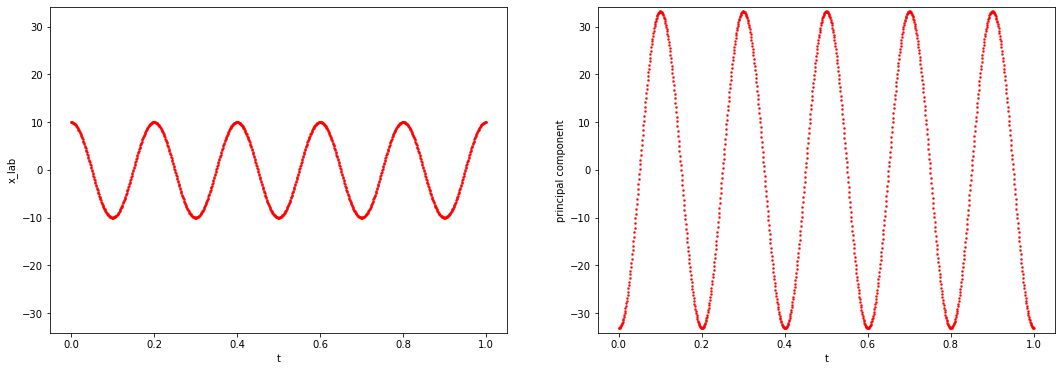

In [18]:
# creating a set of scatter plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# setting the same 'y' axis limits for all the scatter plots in order to get the correct visual effect when comparing the plots themselves to each other
y_min = np.min([x_lab, X_principal['principal component 0']])-1
y_max = np.max([x_lab, X_principal['principal component 0']])+1
custom_ylim = [y_min, y_max]
plt.setp(ax, ylim=custom_ylim)

# plotting (t, x_lab)
sns.scatterplot(x=t, y=x_lab, ax=ax[0], s=5, color='red', edgecolor='red')
ax[0].set_xlabel("t")
ax[0].set_ylabel("x_lab")

# plotting (t, principal component 0)
sns.scatterplot(x=t, y=X_principal['principal component 0'], ax=ax[1], s=5, color='red', edgecolor='red')
ax[1].set_xlabel("t")
ax[1].set_ylabel("principal component")

# commenting on the above plots
print("It is clear that, unless a multiplication factor due to the rotation of the dataset, the principal component coincides with 'x_lab'!")

In [19]:
# creating the dataset 'Xp' obtained as redefinition of the original dataset 'X' in the basis yielded by the PCA procedure
Xp = pd.DataFrame(data=np.dot(X, V_svd), columns=X.columns+'p')
print("Rotated dataset 'Xp':")
Xp

Rotated dataset 'Xp':


,x_labp,y_labp,z_labp,x_cam0p,y_cam0p,z_cam0p,x_cam1p,y_cam1p,z_cam1p,x_cam2p,...,z_cam6p,x_cam7p,y_cam7p,z_cam7p,x_cam8p,y_cam8p,z_cam8p,x_cam9p,y_cam9p,z_cam9p
0,-33.168831,2.853225,2.394692e-15,1.326228e-14,-2.628102e-16,1.405765e-15,2.259243e-15,-2.936660e-15,-1.683082e-15,1.498270e-15,...,5.605304e-17,9.540979e-17,1.776357e-15,7.077672e-16,5.551115e-16,-3.191891e-16,-1.110223e-16,-4.510281e-16,2.220446e-16,-1.304512e-15
1,-33.150826,1.068655,4.017383e-15,1.608241e-14,1.402999e-15,-5.384047e-15,2.907312e-15,-3.234295e-15,-1.693927e-15,1.429359e-15,...,1.170225e-16,-7.632783e-17,-1.776357e-15,3.183218e-16,1.665335e-16,-8.396062e-16,5.551115e-17,-1.072059e-15,4.440892e-16,-6.661338e-16
2,-33.100690,0.006587,1.617328e-15,1.598981e-14,6.096619e-16,-8.930387e-16,3.374511e-15,-2.693506e-15,-7.429907e-16,1.850287e-15,...,1.213202e-15,-5.724587e-17,0.000000e+00,-1.163999e-15,3.885781e-16,-1.419004e-15,1.110223e-16,9.020562e-17,2.220446e-16,-8.118506e-16
3,-33.018401,-0.413870,3.351210e-15,1.486762e-14,-5.595805e-16,-1.893549e-15,2.615180e-15,-1.933073e-15,-2.619282e-15,5.793252e-16,...,6.346637e-16,-2.550044e-16,-8.881784e-16,-6.236331e-16,2.220446e-16,-6.522560e-16,6.106227e-16,-2.949030e-16,5.551115e-16,-8.187895e-16
4,-32.902691,-1.688996,1.419906e-15,1.289958e-14,-2.681046e-16,-1.027557e-15,2.085716e-15,-2.394332e-15,-1.792076e-15,1.022724e-15,...,-2.946951e-16,2.602085e-17,-8.881784e-16,-8.916479e-16,-3.330669e-16,-4.475587e-16,1.665335e-16,-4.544976e-16,6.661338e-16,3.677614e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-32.904939,0.807106,2.514353e-15,1.681689e-14,-7.540695e-16,-2.768785e-15,2.253894e-15,-3.512140e-15,-2.357097e-15,1.346676e-15,...,7.572743e-16,-4.232725e-16,0.000000e+00,-5.334275e-16,-3.330669e-16,-1.460637e-15,-3.885781e-16,-4.996004e-16,2.220446e-16,-2.844947e-16
996,-33.017876,-0.996932,2.146946e-15,1.389681e-14,6.699638e-16,8.093935e-16,1.576972e-15,-2.038060e-15,-3.089508e-15,8.396363e-16,...,-4.342198e-16,-1.700029e-15,-8.881784e-16,-1.391248e-15,-3.330669e-16,-1.068590e-15,-2.220446e-16,-1.540434e-15,3.330669e-16,-9.714451e-16
997,-33.100106,-0.642423,4.052823e-15,1.389118e-14,-2.906383e-16,-1.016809e-15,1.336227e-15,-1.317570e-15,-6.012301e-16,1.218764e-15,...,4.425828e-16,2.220446e-16,0.000000e+00,-1.661865e-15,-3.330669e-16,-8.638923e-16,-2.775558e-16,-1.894318e-15,4.440892e-16,-1.061651e-15
998,-33.149701,-0.179431,3.423616e-15,1.569614e-14,5.447256e-16,-3.892677e-15,3.240789e-15,-2.597819e-15,-2.139577e-15,1.553261e-15,...,1.157357e-16,-1.994932e-16,-8.881784e-16,4.857226e-17,1.110223e-16,-1.134509e-15,-1.110223e-16,-1.391248e-15,6.661338e-16,-6.938894e-16


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [20]:
# getting the dataset 'magic04.data' and its description 'magic04.names'
import wget
#wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data", "/Users/Daniele/data/")
#wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names", "/Users/Daniele/data/")

# printing the description 'magic04.names'
!type \Users\Daniele\data\magic04.names

# loading the dataset 'magic04.data' into a pandas DataFrame 'X'
file_name = "/Users/Daniele/data/magic04.data"
columns_labels = [
                  'fLength',    # continuous # major axis of ellipse [mm]
                  'fWidth',     # continuous # minor axis of ellipse [mm] 
                  'fSize',      # continuous # 10-log of sum of content of all pixels [in #phot]
                  'fConc',      # continuous # ratio of sum of two highest pixels over fSize [ratio]
                  'fConc1',     # continuous # ratio of highest pixel over fSize [ratio]
                  'fAsym',      # continuous # distance from highest pixel to center, projected onto major axis [mm]
                  'fM3Long',    # continuous # 3rd root of third moment along major axis [mm] 
                  'fM3Trans',   # continuous # 3rd root of third moment along minor axis [mm]
                  'fAlpha',     # continuous # angle of major axis with vector to origin [deg]
                  'fDist',      # continuous # distance from origin to center of ellipse [mm]
                  'class'       # g,h        # gamma (signal), hadron (background)
                 ]
X = pd.read_csv(file_name, names=columns_labels)
X['class'] = np.where(X['class'] == 'g', 0, 1)   # converting the data in the 'class' column from (g, h) to (0, 1) in order to be able to perform PCA
print("Dataset 'X':")
X

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,1
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,1


In [21]:
# finding the eigenvectors and eigenvalues of the covariance matrix of the dataset 'X'
cov_X = np.cov(X.T)
#print("Covariance matrix of the dataset 'X':\n", cov_X)
l, V = la.eig(cov_X)
l = np.real_if_close(l)

# sorting the eigenvalues and the corresponding eigenvectors in ascending order w.r.t. the eigenvalues
idx = l.argsort()[::-1]   
l = l[idx]
V = V[:,idx]
print("\nEigenvalues of the covariance matrix of the dataset 'X':\n", l)
#print("\nEigenvectors of the covariance matrix of the dataset 'X':\n", V)


Eigenvalues of the covariance matrix of the dataset 'X':
 [6.57979722e+03 3.85388229e+03 2.01638437e+03 1.32677392e+03
 6.10225863e+02 4.33599203e+02 1.17330701e+02 1.55844865e-01
 8.63156380e-02 1.05942519e-02 3.84503479e-04]


In [22]:
# finding the eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(X.T)
l_svd = spectrum**2/(N-1)
l_svd = np.real_if_close(l_svd)
V_svd = U

# sorting the eigenvalues and the corresponding eigenvectors in ascending order w.r.t. the eigenvalues
idx = l_svd.argsort()[::-1]   
l_svd = l_svd[idx]
V_svd = V_svd[:,idx]
print("Eigenvalues using SVD:\n", l_svd)
#print("\nEigenvectors using SVD:\n", V_svd)

# checking the eigendecomposition of the covariance matrix of 'X'
Lambda = np.diag(l)
print("\nChecking the eigendecomposition of the covariance matrix of 'X':")
print("cov(X) = V*Lambda*V^(-1)? --->", np.allclose(cov_X, np.dot(V, np.dot(Lambda, la.inv(V)))))

# checking the SVD of 'X'
m, n = len(U), len(Vt)
D = np.zeros(shape=(m, n))
np.fill_diagonal(a=D, val=spectrum)
print("\nChecking the SVD of 'X':")
print("X = U*D*V^(T)? --->", np.allclose(X.T, np.dot(U, np.dot(D, Vt))))

# checking if the two procedures yield to the same result
print("\nDo the two procedures yield to the same result? --->", np.allclose(l, l_svd, rtol=1) == True)

Eigenvalues using SVD:
 [9.08896177e+05 7.99325578e+04 3.96853708e+04 2.54849228e+04
 1.56393374e+04 8.25616845e+03 2.23435927e+03 1.07605593e+01
 2.96168141e+00 6.61533445e-01 7.99985333e-03]

Checking the eigendecomposition of the covariance matrix of 'X':
cov(X) = V*Lambda*V^(-1)? ---> True

Checking the SVD of 'X':
X = U*D*V^(T)? ---> True

Do the two procedures yield to the same result? ---> True


In [23]:
# computing the percentage of the total dataset's variability explained by each component
#print("Lambda matrix resulting from the eigendecomposition of the covariance matrix of 'X':\n", Lambda, "\n")
print("Percentage of the total dataset's variability explained by each component of the original dataset 'X':")
for i, j in zip(V, np.diagonal(Lambda)):
    #print("- Eigenvector:", i, "---> Eigenvalue:", j, "---> Variability explained:", (j/Lambda.trace())*100, "%")
    print("- Eigenvalue:", j, "---> Variability explained:", (j/Lambda.trace())*100, "%")

# reducing the dimensionality of the dataset so that at least 99% of the total variability is retained
var_min = 0.99   # minimum percentage of variability that needs to be explained by 'n_components' (number of components to keep)
pca = PCA(n_components=var_min, svd_solver='full')
pc = pca.fit_transform(X)
columns_labels = [str('principal component ' + str(i)) for i in range(pc.shape[1])]
X_principal = pd.DataFrame(data=pc, columns=columns_labels)
print("\nNumber of components in the reduced dataset 'X_principal':", X_principal.shape[1])
var_ratios = pca.explained_variance_ratio_
print("Percentage of the total dataset's variability explained by the reduced dataset 'X_principal':", np.sum(var_ratios)*100, "%")
print("Percentage of the total dataset's variability explained by each component of the reduced dataset 'X_principal':")
for i, j in zip(columns_labels, var_ratios):
    print("- Variability explained by the " + i + ":", j*100, "%")
print("\nReduced dataset 'X_principal':")    
X_principal

Percentage of the total dataset's variability explained by each component of the original dataset 'X':
- Eigenvalue: 6579.797215787781 ---> Variability explained: 44.046649808725036 %
- Eigenvalue: 3853.882291023657 ---> Variability explained: 25.7987591577231 %
- Eigenvalue: 2016.3843730836932 ---> Variability explained: 13.498132761279852 %
- Eigenvalue: 1326.7739245908595 ---> Variability explained: 8.881724544880901 %
- Eigenvalue: 610.2258627019348 ---> Variability explained: 4.084989855639673 %
- Eigenvalue: 433.59920254496234 ---> Variability explained: 2.902611069230919 %
- Eigenvalue: 117.3307007154166 ---> Variability explained: 0.7854382311090001 %
- Eigenvalue: 0.15584486475681042 ---> Variability explained: 0.0010432607506444987 %
- Eigenvalue: 0.08631563796925486 ---> Variability explained: 0.0005778163906823786 %
- Eigenvalue: 0.010594251917831735 ---> Variability explained: 7.092031698035824e-05 %
- Eigenvalue: 0.0003845034794307772 ---> Variability explained: 2.5739532

,principal component 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-117.847795,14.908300,-12.235605,14.309377,3.775479,8.059999
1,-10.030644,-39.385562,7.968421,-17.101782,-16.464053,9.916403
2,58.821780,-40.773814,136.305263,148.408493,39.705961,47.614401
3,-86.685152,12.502613,16.225256,-5.290861,-24.242724,7.073202
4,147.280977,-75.052616,14.825489,-17.442207,-5.159508,-21.286026
...,...,...,...,...,...,...
19015,-92.052730,13.531196,-6.940513,-7.288647,-31.063400,-3.448615
19016,16.858867,-49.242184,35.284040,-21.138290,66.399363,4.370599
19017,63.161390,-34.647193,-16.010828,13.537359,10.692732,9.457261
19018,211.453948,-17.461764,131.598796,24.617554,62.509898,66.687412


In [24]:
# creating the dataset 'Xp' obtained as redefinition of the original dataset 'X' in the basis yielded by the PCA procedure
Xp = pd.DataFrame(data=np.dot(X, V), columns=X.columns+'p')
print("Rotated dataset 'Xp':")
Xp

Rotated dataset 'Xp':


,fLengthp,fWidthp,fSizep,fConcp,fConc1p,fAsymp,fM3Longp,fM3Transp,fAlphap,fDistp,classp
0,-66.770799,55.598153,-13.783263,23.911920,-48.091858,-9.213731,-2.967011,-0.458345,1.975199,-1.359735,0.108163
1,-174.587949,109.892014,-33.987288,-7.499239,-27.852326,-11.070135,0.790249,-0.209665,1.641188,-1.497020,0.033465
2,-243.440374,111.280267,-162.324130,158.011036,-84.022340,-48.768133,-64.167563,-1.215688,1.383386,-1.456280,0.089663
3,-97.933442,58.003840,-42.244123,4.311682,-20.073655,-8.226935,0.863713,-0.210021,1.626658,-1.519466,0.063260
4,-331.899570,145.559069,-40.844356,-7.839664,-39.156871,20.132294,-1.604997,-0.383411,1.816333,-1.442146,0.092252
...,...,...,...,...,...,...,...,...,...,...,...
19015,-92.565864,56.975256,-19.078354,2.313897,-13.252979,2.294883,-2.195481,0.876456,1.878217,-1.572731,0.055112
19016,-201.477461,119.748637,-61.302908,-11.535747,-110.715742,-5.524331,9.893583,0.084713,1.766703,-1.288412,0.112277
19017,-247.779984,105.153646,-10.008039,23.139903,-55.009111,-10.610993,-17.688163,0.438190,2.091970,-1.321927,0.110090
19018,-396.072542,87.968217,-157.617664,34.220098,-106.826277,-67.841144,-23.585781,-0.302339,2.314964,-1.436016,0.081451
